## Sistema de previsão de gravidade de acidente

Rastrear a gravidade de um acidente é crucial para o time de UTI do hospital mais próximo, pois permite uma resposta rápida e eficiente, garantindo que recursos médicos adequados sejam alocados com prioridade. Informações precisas sobre a severidade ajudam a determinar a necessidade de suporte avançado, como equipes especializadas, equipamentos de emergência e leitos de UTI, otimizando o atendimento e aumentando as chances de sobrevivência das vítimas em situações críticas.

In [30]:
# Apresentação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

dados = pd.read_csv('data/accident_prediction_india.csv')
dados.head(5)

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


## Random Florest

Teste do uso de Random Florest para a predição de gravidade do acidente com informações limitadas.

In [31]:
# Seleção de informações

dados.head()
dados_RF = dados[['Day of Week','Accident Severity','Time of Day','Number of Vehicles Involved','Vehicle Type Involved',
                  'Number of Casualties','Weather Conditions','Road Condition','Lighting Conditions',
                  'Speed Limit (km/h)','Driver Age','Driver Gender','Driver License Status',
                  'Alcohol Involvement','Accident Location Details']]
dados_RF.head(5)

,Day of Week,Accident Severity,Time of Day,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Weather Conditions,Road Condition,Lighting Conditions,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Monday,Serious,1:46,5,Cycle,0,Hazy,Wet,Dark,61,66,Male,NaN,Yes,Curve
1,Wednesday,Minor,21:30,5,Truck,5,Hazy,Dry,Dusk,92,60,Male,NaN,Yes,Straight Road
2,Wednesday,Minor,5:37,5,Pedestrian,6,Foggy,Under Construction,Dawn,120,26,Female,NaN,No,Bridge
3,Saturday,Minor,0:31,3,Bus,10,Rainy,Dry,Dark,76,34,Female,Valid,Yes,Straight Road
4,Thursday,Minor,11:21,5,Cycle,7,Foggy,Wet,Dusk,115,30,Male,NaN,No,Intersection


In [32]:
# Limpando os dados Nan da falta de carteira para o filtro (2)

dados_RF['Driver License Status'] = dados_RF['Driver License Status'].fillna(2)

# Criando dicionários de mapeamento para variáveis categóricas
mapeamento_categorico = {
    "Day of Week": {
        "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6
    },
    "Accident Severity": {
        "Minor": 0, "Serious": 1, "Fatal": 2
    },
    "Vehicle Type Involved": {
        "Car": 0, "Cycle": 1, "Truck": 2, "Bus": 3, "Pedestrian": 4, "Two-Wheeler": 5, "Auto-Rickshaw": 6
    },
    "Weather Conditions": {
        "Hazy": 0, "Rainy": 1, "Foggy": 2, "Stormy": 3, "Clear": 4
    },
    "Road Condition": {
        "Dry": 0, "Wet": 1, "Under Construction": 2, "Damaged": 3
    },
    "Lighting Conditions": {
        "Daylight": 0, "Dark": 1, "Dusk": 2, "Dawn": 4
    },
    "Driver Gender": {
        "Male": 0, "Female": 1
    },
    "Driver License Status": {
        "Valid": 0, "Expired": 1, "No License": 2
    },
    "Alcohol Involvement": {
        "No": 0, "Yes": 1
    },
    "Accident Location Details": {
        "Curve": 0, "Straight Road": 1, "Bridge": 2, "Intersection": 3
    }
}

# Extraindo apenas a hora da coluna 'Time of Day'
dados_RF['Time of Day'] = dados_RF['Time of Day'].str.split(':').str[0].astype(int)


# Aplicando o mapeamento ao dataframe
for coluna, mapeamento in mapeamento_categorico.items():
    if coluna in dados_RF.columns:
        dados_RF[coluna] = dados_RF[coluna].replace(mapeamento)

# Verificando os dados transformados
dados_RF.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_25832\1514673609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_RF['Driver License Status'] = dados_RF['Driver License Status'].fillna(2)
C:\Users\marco\AppData\Local\Temp\ipykernel_25832\1514673609.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_RF['Time of Day'] = dados_RF['Time of Day'].str.split(':').str[0].astype(int)
C:\Users\marco\AppData\Local\Temp\ipykernel_25832\1514673609.py:46: FutureWarning: Downcasting behavior in `replace` is d

,Day of Week,Accident Severity,Time of Day,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,Weather Conditions,Road Condition,Lighting Conditions,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,0,1,1,5,1,0,0,1,1,61,66,0,2,1,0
1,2,0,21,5,2,5,0,0,2,92,60,0,2,1,1
2,2,0,5,5,4,6,2,2,4,120,26,1,2,0,2
3,5,0,0,3,3,10,1,0,1,76,34,1,0,1,1
4,3,0,11,5,1,7,2,1,2,115,30,0,2,0,3


In [33]:
# Divisão dos dados em conjunto de treino e teste

x = dados_RF.drop('Accident Severity', axis=1)
y = dados_RF['Accident Severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Treinando o Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Realizando Previsões
y_pred = modelo.predict(x_test)

In [36]:
print("Relatórios de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Relatórios de Classificação:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       202
           1       0.31      0.27      0.29       195
           2       0.33      0.26      0.29       203

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.32       600
weighted avg       0.33      0.33      0.32       600

Matriz de Confusão:
[[90 62 50]
 [85 53 57]
 [95 55 53]]


Acurácia de 32% é extremamente baixa para um poblema de apenas 3 classes.

C:\Users\marco\AppData\Local\Temp\ipykernel_25832\67941644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident Severity', data=dados_RF, palette='viridis')


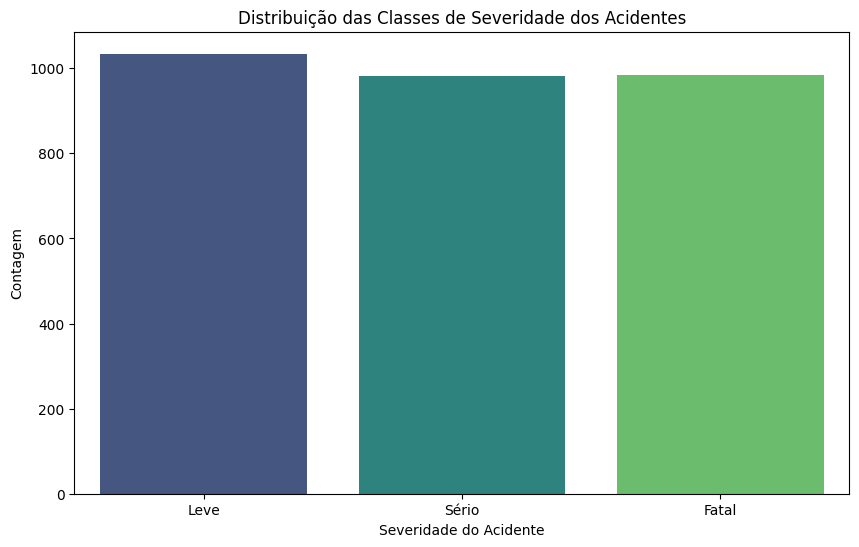

In [37]:
# Verificando a distribuição das classes no conjunto de treino
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident Severity', data=dados_RF, palette='viridis')
plt.title('Distribuição das Classes de Severidade dos Acidentes')
plt.xlabel('Severidade do Acidente')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1, 2], labels=['Leve', 'Sério', 'Fatal'])
plt.show()

[0.07437452 0.11020218 0.06277794 0.0772312  0.09008852 0.06200045
 0.05440167 0.05551215 0.13402946 0.12879642 0.02658338 0.04117072
 0.02845086 0.05438054]


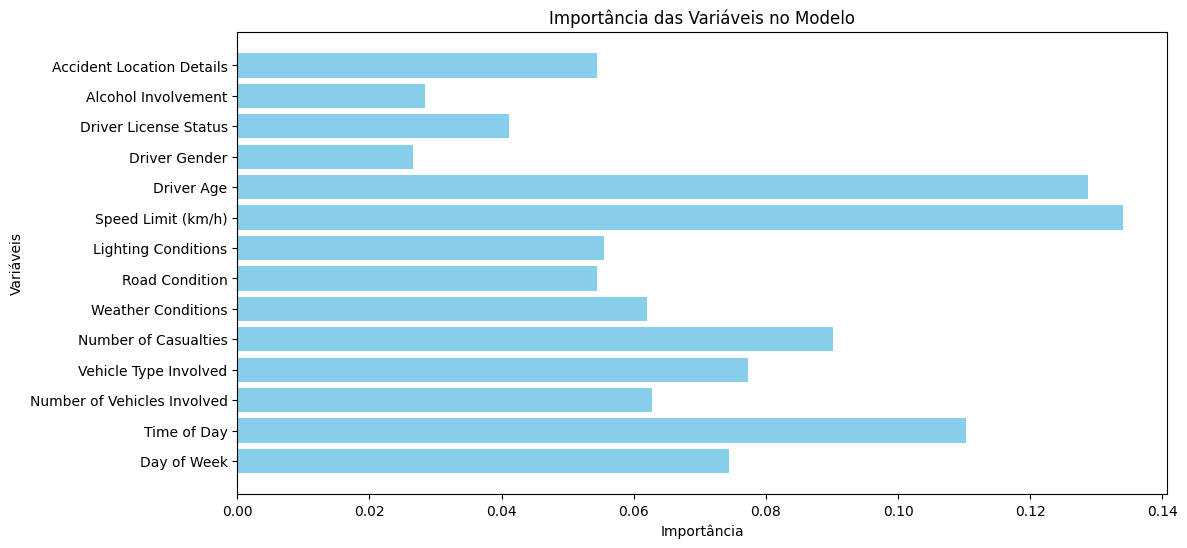

In [38]:
# Procurando dados inrrelevantes ou ruidos

importances = modelo.feature_importances_
feature_names = x.columns
sorted(zip(importances, feature_names), reverse=True)
print(importances)
# Plotando a importância das variáveis  
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo')
plt.show()


Com a análise de importancia das variáveis no Modelo vamos cortar todas as variaveis que estão abaixo de 0.7 e rever a acurácia.

In [39]:
# Selecionando as variáveis mais relevantes
dados_RFv1 = dados_RF[['Day of Week', 'Time of Day', 'Vehicle Type Involved','Number of Casualties','Speed Limit (km/h)','Driver Age','Accident Severity']]
dados_RFv1.head(5)

,Day of Week,Time of Day,Vehicle Type Involved,Number of Casualties,Speed Limit (km/h),Driver Age,Accident Severity
0,0,1,1,0,61,66,1
1,2,21,2,5,92,60,0
2,2,5,4,6,120,26,0
3,5,0,3,10,76,34,0
4,3,11,1,7,115,30,0


In [40]:
# Separando os dados em treino e teste
x = dados_RFv1.drop('Accident Severity', axis=1)
y = dados_RFv1['Accident Severity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# Treinando o modelo com as variáveis selecionadas
modelo_v1 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_v1.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Realizando previsões
y_pred_v1 = modelo_v1.predict(x_test)

In [43]:
print("Relatórios de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Relatórios de Classificação:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       202
           1       0.31      0.27      0.29       195
           2       0.33      0.26      0.29       203

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.32       600
weighted avg       0.33      0.33      0.32       600

Matriz de Confusão:
[[90 62 50]
 [85 53 57]
 [95 55 53]]


In [46]:
# Verificando as colunas do conjunto de treino
print("Colunas do conjunto de treino:")
print(x_train.columns)

Colunas do conjunto de treino:
Index(['Day of Week', 'Time of Day', 'Vehicle Type Involved',
       'Number of Casualties', 'Speed Limit (km/h)', 'Driver Age'],
      dtype='object')


In [49]:
# Verificando a distribuição das classes no conjunto de treino

print(y_train.value_counts())
print(y_test.value_counts())

Accident Severity
0    832
1    786
2    782
Name: count, dtype: int64
Accident Severity
2    203
0    202
1    195
Name: count, dtype: int64
